In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("C:\\Users\\DELL\\OneDrive\\Desktop\\EastWestAirlines.csv")

In [3]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
data = data.drop({'Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Award?'},axis=1)

In [5]:
data.head()

,ID#,Balance,Bonus_miles,Days_since_enroll
0,1,28143,174,7000
1,2,19244,215,6968
2,3,41354,4123,7034
3,4,14776,500,6952
4,5,97752,43300,6935


array([[<AxesSubplot:title={'center':'ID#'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'Bonus_miles'}>,
        <AxesSubplot:title={'center':'Days_since_enroll'}>]], dtype=object)

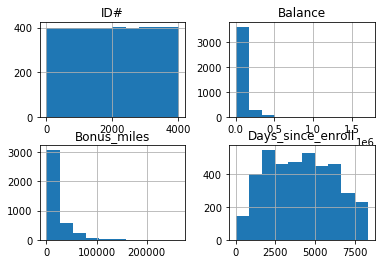

In [6]:
data.hist()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Bonus_miles        3999 non-null   int64
 3   Days_since_enroll  3999 non-null   int64
dtypes: int64(4)
memory usage: 125.1 KB


In [8]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_df = scaler.fit_transform(data.iloc[:,:])

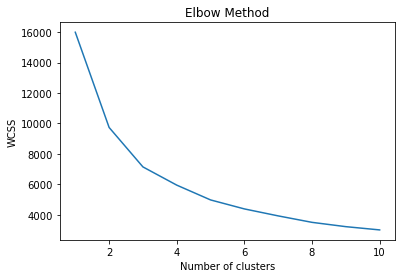

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_data_df)

KMeans(n_clusters=3, random_state=42)

In [11]:
clusters_new.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [12]:
#Assign clusters to the data set
data['clusterid_new'] = clusters_new.labels_

In [13]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.688822  ,  1.61026512,  1.83747396,  0.70182644],
       [ 0.91996783, -0.2717075 , -0.26872472, -0.90294775],
       [-0.80461477, -0.15564057, -0.2223901 ,  0.78253089]])

In [14]:
data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Bonus_miles,Days_since_enroll
,,mean,mean,mean,mean
0,0,1215.359408,235856.575053,61516.071882,5567.744186
1,1,3082.551799,46223.247001,10655.695747,2254.083969
2,2,1080.968085,57918.507092,11774.581560,5734.388889


In [15]:
data.head()

,ID#,Balance,Bonus_miles,Days_since_enroll,clusterid_new
0,1,28143,174,7000,2
1,2,19244,215,6968,2
2,3,41354,4123,7034,2
3,4,14776,500,6952,2
4,5,97752,43300,6935,2


# Inference

In [16]:
# with the help of elbow method we are finding the optimum number of clusters.Ans we got 4 clusters.